Import Libraries

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [ ]:
!pip install pyarrow

## Homework Questions

Q1. # columns in January 2023 data? 19

In [ ]:
!wget -P ~/data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget -P ~/data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

In [8]:
jan_2023 = pd.read_parquet('~/data/yellow_tripdata_2023-01.parquet')
# jan_2023 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [9]:
jan_2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [10]:
jan_2023.shape

(3066766, 19)

In [11]:
jan_2023.nunique()

VendorID                       2
tpep_pickup_datetime     1610975
tpep_dropoff_datetime    1611319
passenger_count               10
trip_distance               4387
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 257
DOLocationID                 261
payment_type                   5
fare_amount                 6873
extra                         68
mta_tax                       10
tip_amount                  4036
tolls_amount                 776
improvement_surcharge          5
total_amount               15871
congestion_surcharge           3
airport_fee                    3
dtype: int64

Q2. standard deviation of trip duration in minutes? 42.59 minutes

In [12]:
jan_2023.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [13]:
jan_2023['duration'] = (jan_2023['tpep_dropoff_datetime'] - jan_2023['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)

In [14]:
jan_2023['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

Q3. Fraction of records after dropping off the outliers? 98%

In [15]:
filtered_jan_2023 = jan_2023[(jan_2023['duration'] >= 1) & (jan_2023['duration'] <= 60)]

In [16]:
# percentage of filtered data 
filtered_jan_2023.shape[0] / jan_2023.shape[0] * 100

98.1220282212598

In [17]:
filtered_jan_2023.nunique()

VendorID                       2
tpep_pickup_datetime     1596945
tpep_dropoff_datetime    1597754
passenger_count                9
trip_distance               3759
RatecodeID                     6
store_and_fwd_flag             2
PULocationID                 255
DOLocationID                 260
payment_type                   5
fare_amount                 6148
extra                         64
mta_tax                       10
tip_amount                  3671
tolls_amount                 694
improvement_surcharge          5
total_amount               14512
congestion_surcharge           3
airport_fee                    3
duration                    3541
dtype: int64

Q4. Col dimension of one-hot-encoded Location ID feature matrix? 515

In [18]:
categorical = ['PULocationID', 'DOLocationID']
filtered_jan_2023[categorical] = filtered_jan_2023[categorical].astype(str)

/tmp/ipykernel_14472/2526089752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_2023[categorical] = filtered_jan_2023[categorical].astype(str)


In [19]:
dict_feats = filtered_jan_2023[categorical].to_dict(orient='records')

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(dict_feats)

In [21]:
X_train.shape

(3009173, 515)

Q5. RMSE of the linear regression model on the train set? 7.64

In [2]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    
    # add trip duration in minutes as a col
    df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime) / pd.Timedelta(minutes=1)
    # only include the data with duration btw 1 and 60 min (inclusive)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    # Location ID cols as str
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [3]:
df_train = read_dataframe('~/data/yellow_tripdata_2023-01.parquet')
df_val= read_dataframe('~/data/yellow_tripdata_2023-02.parquet')

In [4]:
len(df_train), len(df_val)

(3009173, 2855951)

In [5]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [6]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.6492610279057605

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


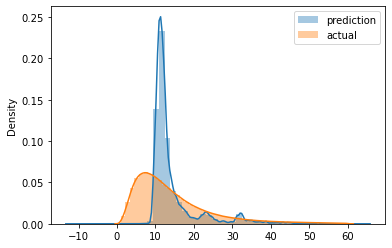

In [12]:
81

Q6. RMSE of the linear regression model on the validation set? 7.81

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.81183265470218

In [22]:
with open('../models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)